In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cfgrib

folder_data = "/Odyssey/private/t22picar/data/mld/"
#file_glorys = "era5_2019-2021_hourly.grib" # Actually not glorys 
file_obs = "mld_2009-12-30-2022-12-28.nc"
maps = xr.open_dataset(folder_data+file_obs)
lat_obs = maps.latitude.values
lon_obs = maps.longitude.values
maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})

In [3]:
folder_data_4th = "/Odyssey/private/t22picar/data/ssh_L4/"
file_glorys_4th = "SSH_L4_CMEMS_2010-01-01-2024-01-01_4th.nc"
maps_4th = xr.open_dataset(folder_data_4th+file_glorys_4th).sel(time=slice("2010-01-01","2022-12-28"))
maps_4th


<xarray.Dataset> Size: 69GB
Dimensions:  (time: 4383, lat: 680, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 35kB 2010-01-01 2010-01-02 ... 2021-12-31
  * lat      (lat) float32 3kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float32 6kB -180.0 -179.7 -179.5 -179.2 ... 179.4 179.7 179.9
Data variables:
    zos      (time, lat, lon) float32 17GB ...
    sla      (time, lat, lon) float32 17GB ...
    ugos     (time, lat, lon) float32 17GB ...
    vgos     (time, lat, lon) float32 17GB ...
Attributes:
    references:                http://marine.copernicus.eu
    title:                     DT merged all satellites Global Ocean Gridded ...
    history:                   2024-10-23 12:55:06Z: Creation
    source:                    Altimetry measurements
    comment:                   Sea Surface Height measured by Altimetry and d...
    institution:               CLS, CNES
    contact:                   servicedesk.cmems@mercator-ocean.eu
    Conventions:               CF-1.6
    copernicusmarine_version:  2.0.1

In [4]:
# Daily interpolation
maps_inter = maps.interp({"time": maps_4th.time}, method="linear")

: 

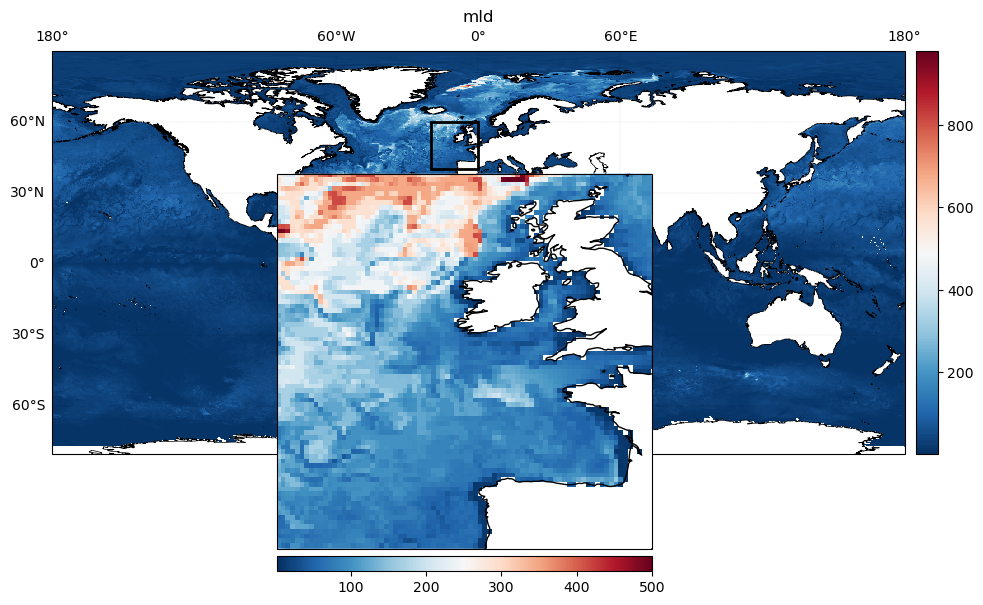

In [ ]:
plot_map_zoom(maps_4th.mlotst[0],maps_4th.lon.values,maps_4th.lat.values,title="mld",vmax=500)

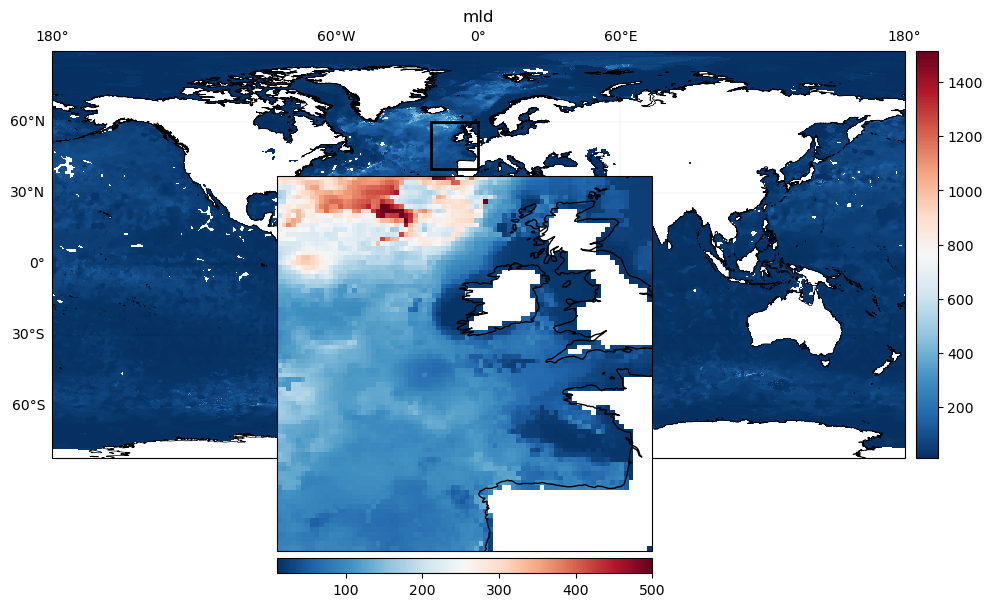

In [ ]:
plot_map_zoom(maps_inter.mlotst[0],maps_inter.lon.values,maps_inter.lat.values,title="mld",vmax=500)

In [ ]:
# grid interpolation 
maps_inter = maps_inter.interp({"lat":maps_4th.lat, "lon":maps_4th.lon}, method="linear")

In [ ]:
#Check 
maps_inter

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 366, lat: 680, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2020-01-01
    depth    float32 4B 15.81
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    mlotst   (time, lat, lon) float64 3GB nan nan nan nan ... nan nan nan nan
Attributes:
    history:                   2023-11-10 00:00:00 ARMOR3D REP - TSHUV Global...
    Conventions:               CF-1.0
    institution:               CLS
    title:                     ARMOR3D REP - TSHUVMld Global Ocean Observatio...
    copernicusmarine_version:  2.0.1

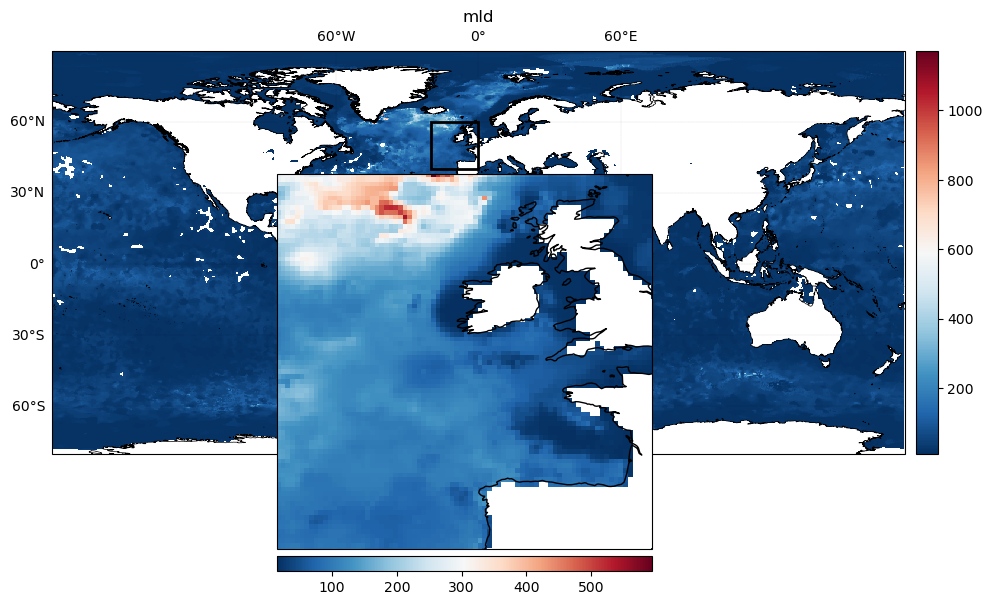

In [ ]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_inter.mlotst[0],maps_inter.lon.values,maps_inter.lat.values,title="mld")

In [ ]:
# save data 
save_file=file_obs[:-3]+"_daily_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_inter.to_netcdf(folder_data+save_file)
